In [ ]:
import math
import zipfile

from IPython.core.display import display
from PIL import Image, ImageDraw, ImageFont
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# class declaration for storing photos, text on it, and pictures with faces
class AnalyzedPhoto:

    # A method that recognizes text in an image
    # Used when initializing a class and stored in ".text"
    def text_on_photo(self):
        changed_photo = self.pix.convert('L')
        for x in range(changed_photo.width):
            for y in range(changed_photo.height):
                if changed_photo.getpixel((x,y)) > 245:
                    changed_photo.putpixel((x,y), 255)
                else:
                    changed_photo.putpixel((x,y), 0)

        print("I find text on photo" + self.name)
        return pytesseract.image_to_string(changed_photo)

    # A method that recognizes faces in a picture and composes a single picture from them
    # Used when initializing a class and stored in ".faces"
    def search_faces(self):
        open_cv_photo = np.array(self.pix.convert("L"))
        faces_lst = face_cascade.detectMultiScale(open_cv_photo, 1.35)
        if len(faces_lst) == 0:
            self.faces = False
            return False
        max_width = 100
        max_height = 100

        faces_sheet = Image.new(self.pix.mode, (max_width * 5, max_height * math.ceil(len(faces_lst) / 5)))
        x1=0
        y1=0

        for x,y,w,h in faces_lst:
            face_photo = self.pix.crop((x,y,x+w,y+h))
            face_photo.thumbnail((max_width, max_height))
            faces_sheet.paste(face_photo, (x1, y1))
            if x1+max_width == faces_sheet.width:
                x1=0
                y1=y1+max_height
            else:
                x1=x1+max_width


        print("I find faces on photo" + self.name)
        return faces_sheet


    # Initializing the class
    def __init__(self, p, ni):
        self.pix = p                           #Photo for analysis
        self.name = ni                         #Photo title
        self.text = self.text_on_photo()       #Text on it
        self.faces = self.search_faces()       #Picture with faces on it


    def __str__(self):
        return self.name

    # Overriding the method from "Display", so that the class can handle "Display" and get a picture
    def _repr_png_(self):
        return display(self.pix)

    # Overriding the method from "Display", so that the class can handle "Display"
    # and not get a text
    def __repr__(self):
        return ""

# Unpacking the archive into list of tuples ("photo", "name of photo")
def unpack(file_name):
    zip_file = zipfile.ZipFile(file_name, mode="r")
    photo_lst = []
    for photo in zip_file.namelist():
        photo_lst.append((Image.open(zip_file.open(photo)),photo))
    zip_file.close()
    return photo_lst


images = unpack("images.zip")


final_images = [AnalyzedPhoto(x,y) for (x,y) in images]




I find faces on photo, coefficient = 1.48
I find faces on photo, coefficient = 1.48
I find faces on photo, coefficient = 1.48
I find faces on photo, coefficient = 1.48
I find faces on photo, coefficient = 1.48
I find faces on photo, coefficient = 1.48
I find faces on photo, coefficient = 1.48
I find faces on photo, coefficient = 1.48
I find faces on photo, coefficient = 1.48
I find faces on photo, coefficient = 1.48
I find faces on photo, coefficient = 1.48
I find faces on photo, coefficient = 1.48
I find faces on photo, coefficient = 1.48
I find faces on photo, coefficient = 1.48


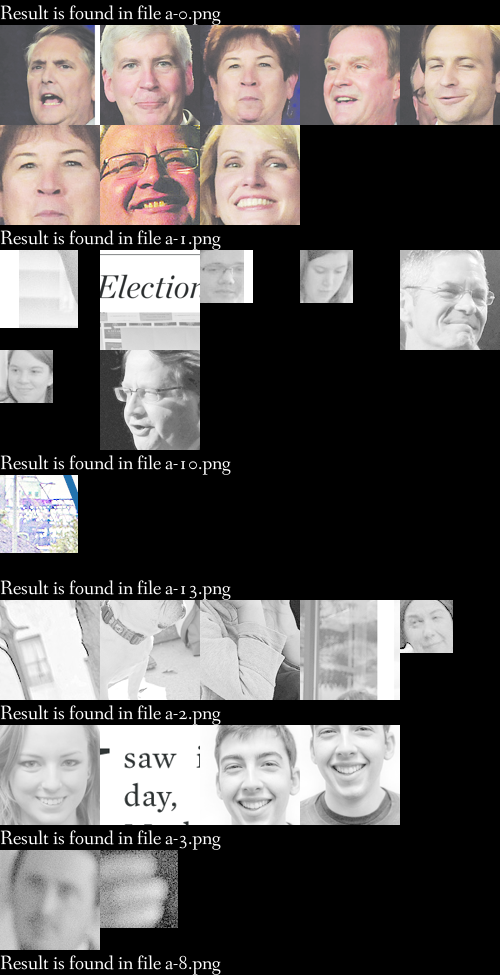

In [24]:
def search_faces(photo, amogus):
        open_cv_photo = np.array(photo.convert("L"))
        faces_lst = []
        faces_lst = face_cascade.detectMultiScale(open_cv_photo, amogus)
        #if len(faces_lst) == 0:
        #    self.faces = False
       #     return False
        max_width = 100
        max_height = 100
        faces_sheet = Image.new(photo.mode, (max_width * 5, max_height * math.ceil(len(faces_lst) / 5)))
        x1=0
        y1=0

        for x,y,w,h in faces_lst:
            face_photo = photo.crop((x,y,x+w,y+h))
            face_photo.thumbnail((max_width, max_height))
            faces_sheet.paste(face_photo, (x1, y1))
            if x1+max_width == faces_sheet.width:
                x1=0
                y1=y1+max_height
            else:
                x1=x1+max_width


        print("I find faces on photo, coefficient = " + str(amogus))
        return faces_sheet

for n in final_images:
    n.faces = search_faces(n.pix, 1.35)




def search_word(final_images_lst, word):
    images_with_word = {}
    output_image_height = 0
    for final_image in final_images_lst:
        if word in final_image.text:
            if final_image.faces:
                images_with_word[final_image] = True
                output_image_height += final_image.faces.height
            else:
                images_with_word[final_image] = False
                output_image_height += 25
            output_image_height += 25

    font1 = ImageFont.truetype("readonly/fanwood-webfont.ttf", 20)
    final_sheet = Image.new(final_images_lst[0].pix.mode, (500, output_image_height))
    y=0
    for image in images_with_word:
        draw = ImageDraw.Draw(final_sheet)
        draw.text((0,y),"Result is found in file {}".format(image.name), font = font1 )
        y += 25
        if images_with_word[image]:
            final_sheet.paste(image.faces, (0, y))
            y += image.faces.height
        else:
            draw = ImageDraw.Draw(final_sheet)
            draw.text((0,y),"But there were no faces in that file!", font = font1 )
            y += 25

    display(final_sheet)



search_word(final_images, "Mark")






In [ ]:
def search_faces(photo, amogus):
        open_cv_photo = np.array(photo.convert("L"))
        faces_lst = []
        faces_lst = face_cascade.detectMultiScale(open_cv_photo, amogus)
        #if len(faces_lst) == 0:
        #    self.faces = False
       #     return False
        max_width = 0
        max_height = 0
        for face in faces_lst:
            max_width = max(max_width, face[2])
            max_height = max(max_height, face[3])
        faces_sheet = Image.new(photo.mode, (max_width * 5, max_height * math.ceil(len(faces_lst) / 5)))
        x1=0
        y1=0

        for x,y,w,h in faces_lst:
            face_photo = photo.crop((x,y,x+w,y+h))
            faces_sheet.paste(face_photo, (x1, y1))
            if x1+max_width == faces_sheet.width:
                x1=0
                y1=y1+max_height
            else:
                x1=x1+max_width


        print("I find faces on photo, coefficient = " + str(amogus))
        display(faces_sheet)

for sus in range(125, 180, 1):
    search_faces(images[0][0], float(sus/100))

In [ ]:
#1.4 1.48